# Project: Investigating the TMBD Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclu_limit">Limitation & Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project will be used to analysis The Movie DB dataset, that talks about the moives. The following are the areas that I want to analyse:
- trending genres,
- best time for release,
- movies' runtime,
- which production company has made the most on market.

The implemetation will be carried out with the data scrapped from the Kaggle and manipulated according to the questions we want to answer in our analysis.

After obtaining cleaned dats, we perform exploratory data analysis on our dataset. Individual analysis is presented further in the report along with codes.

> **Note**: rename the csv file to movies.csv

In [1]:
#importing all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Performing  operations to inspect data.
mdb = pd.read_csv("movies.csv")
mdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### From the above information we can conclude the following:
- **id**: represents random ids.
- **imdb_id**: represents random ids. 
- **popularity**: popularity metric.
- **budget**: financial plan defined for making the movie. 
- **revenue**: earned income, after movie's release.
- **original_title**: title of the movie
- **cast**: people who potrayed characters defined in the movie
- **homepage**: landing web page of the movie.
- **director**: a person who guided the movie towards it's completion
- **tagline**: more of a catchphrase
- **keywords**: mostly used for search indexing the movie in DB.
- **overview**: short description of the movie.
- **runtime**: duration/how long is the movie.
- **genres**: categorization.
- **production_companies**: companies who sponsered/pitched in the "money".
- **release_date**: when the movie was released
- **vote_count**: number of hits for a movie.
- **vote_average**: mean of all hits
- **release_year**: year when the movie was released.
- **budget_adj & revenue_adj**: show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

### 1. Lets clean some data
- checking for duplicates.
- removing null values.
- converting to appropriate datetime format(s).
- renaming columns, dropping unwanted columns.

In [3]:
#checking for duplicates in id, imdb_id
sum(mdb['id'].duplicated()), sum(mdb['imdb_id'].duplicated())

(1, 10)

In [4]:
#removing the duplicates
mdb.drop_duplicates(subset=['id', 'imdb_id'], inplace = True)
sum(mdb.duplicated())

0

In [5]:
#checking if any column has null values
mdb.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

In [6]:
#removing columns that are not related to my analysis.
col = ['id', 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies']
mdb.drop(axis = 1, columns = col, inplace = True)

In [7]:
#rename few columns 
mdb.rename(columns={'original_title':'title', 'release_date':'quarter', 'release_year':'year'}, inplace=True)

In [8]:
#converting release date to quarter
mdb['quarter'] = pd.PeriodIndex(pd.to_datetime(mdb['quarter']), freq='Q-MAR').strftime('Q%q')

In [9]:
#removing 0s from revenue and budget
zeros = ['budget', 'revenue', 'budget_adj', 'revenue_adj']
mdb[zeros] = mdb[zeros].replace(0, np.NaN)

In [10]:
#dropping null values
mdb.dropna(inplace=True)
mdb.isnull().sum()

popularity      0
budget          0
revenue         0
title           0
runtime         0
genres          0
quarter         0
vote_count      0
vote_average    0
year            0
budget_adj      0
revenue_adj     0
dtype: int64

In [11]:
#first 5 rows of the dataset
mdb.reset_index(inplace=True)
mdb.head(5)

,index,popularity,budget,revenue,title,runtime,genres,quarter,vote_count,vote_average,year,budget_adj,revenue_adj
0,0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,Q1,5562,6.5,2015,1.379999e+08,1.392446e+09
1,1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,Q1,6185,7.1,2015,1.379999e+08,3.481613e+08
2,2,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,Q4,2480,6.3,2015,1.012000e+08,2.716190e+08
3,3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,Q3,5292,7.5,2015,1.839999e+08,1.902723e+09
4,4,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,Q1,2947,7.3,2015,1.747999e+08,1.385749e+09


In [12]:
#last 10 rows of the dataset
mdb.tail(10)

,index,popularity,budget,revenue,title,runtime,genres,quarter,vote_count,vote_average,year,budget_adj,revenue_adj
3844,10779,0.411826,12000000.0,22765081.0,Convoy,110,Action|Comedy|Drama,Q1,31,6.2,1978,4.011241e+07,7.609685e+07
3845,10780,0.409377,3500000.0,24046533.0,Invasion of the Body Snatchers,115,Horror|Thriller|Science Fiction|Mystery,Q3,87,6.5,1978,1.169945e+07,8.038036e+07
3846,10788,0.277769,24000000.0,21049053.0,The Wiz,134,Adventure|Family|Fantasy|Music|Science Fiction,Q3,30,6.1,1978,8.022482e+07,7.036068e+07
3847,10791,0.236193,6800000.0,26518355.0,Damien: Omen II,107,Action|Drama|Horror|Thriller,Q1,71,6.1,1978,2.273036e+07,8.864292e+07
3848,10793,0.226002,1000000.0,3713768.0,Watership Down,88,Adventure|Animation|Drama,Q3,67,6.8,1978,3.342701e+06,1.241401e+07
3849,10822,0.670274,7500000.0,33736689.0,Who's Afraid of Virginia Woolf?,131,Drama,Q1,74,7.5,1966,5.038511e+07,2.266436e+08
3850,10828,0.402730,3000000.0,13000000.0,Torn Curtain,128,Mystery|Thriller,Q2,46,6.3,1966,2.015404e+07,8.733419e+07
3851,10829,0.395668,4653000.0,6000000.0,El Dorado,120,Action|Western,Q3,36,6.9,1966,3.125892e+07,4.030809e+07
3852,10835,0.299911,12000000.0,20000000.0,The Sand Pebbles,182,Action|Adventure|Drama|War|Romance,Q3,28,7.0,1966,8.061618e+07,1.343603e+08
3853,10848,0.207257,5115000.0,12000000.0,Fantastic Voyage,100,Adventure|Science Fiction,Q2,42,6.7,1966,3.436265e+07,8.061618e+07


In [13]:
#after cleaning
mdb.shape

(3854, 13)

## From the above cleaning steps the following are concluded:
- Columns **id, imdb_id, cast, homepage, director, tagline, keywords, production companies and overview**, were dropped as they were not related to analysis.
- Column release_date has been converted to quarter **Q1-Q4**, to get better analysis.
- After cleaning, a total of **3854** rows and **12** coumns are found to be unique.

<a id='eda'></a>
## Exploratory Data Analysis

### Q1. What is the most popular genre?

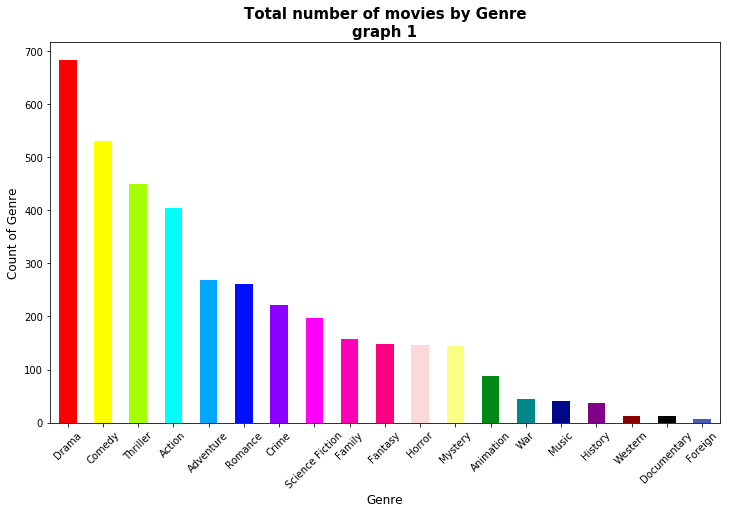

In [14]:
#counting number of genres
temp1 = pd.Series(mdb['genres'].str.split("|", expand=True).stack().reset_index(drop=True))
temp2 = pd.Series(mdb['year'])
temp = pd.DataFrame({'year':temp2, 'genre':temp1}, columns=['year','genre'])
temp.dropna(inplace=True)
temp.year = temp.year.astype(int)
colors = ['#FF0000', '#FFFF00', '#A6FF00', '#00FFFB', '#00A6FF', '#000FFF', '#8B00FF', '#FF00F7', '#FF00B6', '#FF0083',
         '#FCD9D9', '#F9FF80', '#008915', '#008789', '#000889', '#810089', '#890000', '#000000', '#465EB6', '#23A09C']
temp.genre.value_counts().plot(kind='bar', figsize=(12,7), color = colors)
plt.xticks(rotation=45)
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Count of Genre", fontsize=12)
plt.title("Total number of movies by Genre\ngraph 1", fontsize=15, fontweight='bold');

### Q2. How are the trends changing in the genre of movies, over the years?

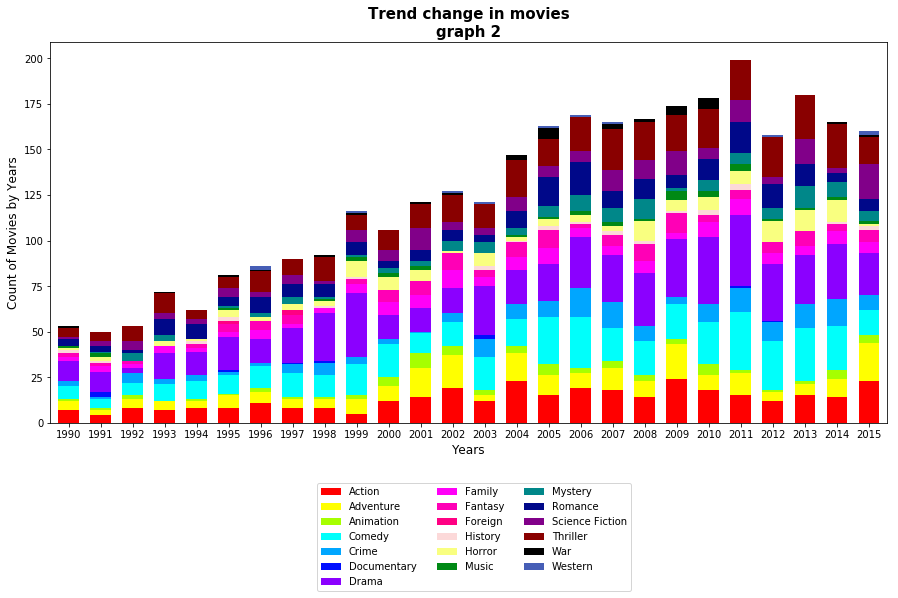

In [15]:
#count of movie genres over the years 
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_ticks(np.arange(1990, 2016, 5))
temp = temp[temp['year'] > 1989]
temp.groupby(['year','genre']).size().unstack().plot(kind = "bar",
                                                     ax = ax,
                                                     width = .65,
                                                     stacked = True,
                                                     color = colors)
plt.xticks(rotation=0)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Count of Movies by Years', fontsize=12)
plt.title("Trend change in movies\ngraph 2", fontsize=15, fontweight='bold')
plt.legend(loc='right', bbox_to_anchor=(0.70,-0.3), ncol=3);

### Q3. Which quarter has most movie releases?

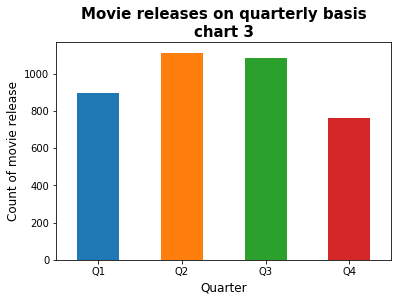

In [16]:
#number of movie releases in each quarter
mdb.groupby('quarter')['year'].count().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Count of movie release", fontsize=12)
plt.title("Movie releases on quarterly basis\nchart 3", fontsize=15, fontweight='bold');

### Q4.Does a movie released in particular quarter, have more impact on revenue earned?

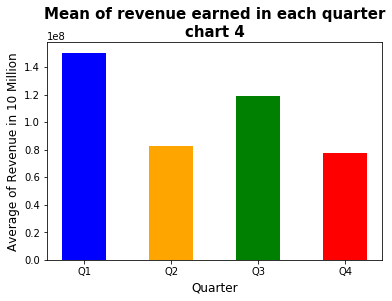

In [17]:
#revenue collected in each quarter
temp = mdb.groupby('quarter', as_index=False)['revenue'].mean()
xdata = temp.quarter.tolist()
ydata = temp.revenue.tolist()
plt.bar(xdata, ydata, color=['blue', 'orange', 'green','red'], width=0.5)
plt.xlabel("Quarter", fontsize=12)
plt.ylabel("Average of Revenue in 10 Million", fontsize=12)
plt.title("Mean of revenue earned in each quarter\nchart 4", fontsize=15, fontweight='bold');

### Q5. What is the mean of vote average?

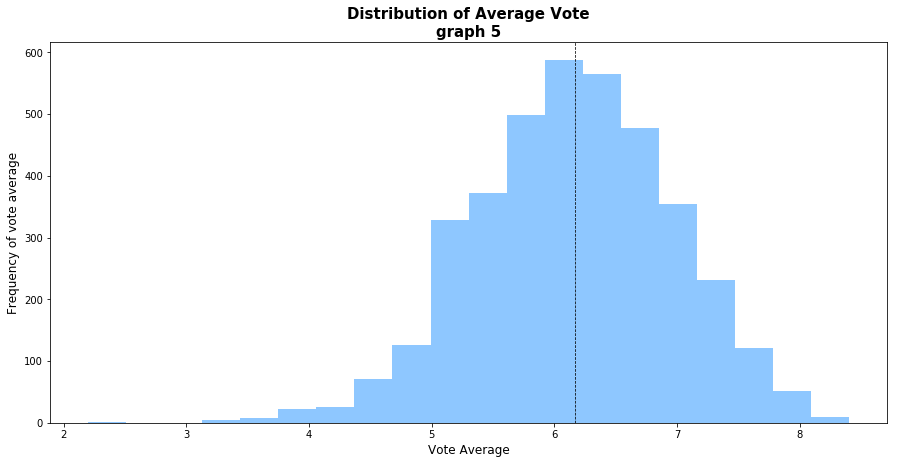

In [18]:
#vote average distribution
mdb['vote_average'].hist(figsize=(15,7), color="dodgerblue", bins=20, grid=False, alpha=0.5)
plt.axvline(mdb.vote_average.mean(), color='black', linestyle="dashed", linewidth=0.75)
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency of vote average", fontsize=12)
plt.title("Distribution of Average Vote\ngraph 5", fontsize=15, fontweight='bold');

In [19]:
#mean of vote average
mdb.vote_average.mean()

6.168162947586924

### Q6. Does runtime of a movie affect the average vote for the movie?

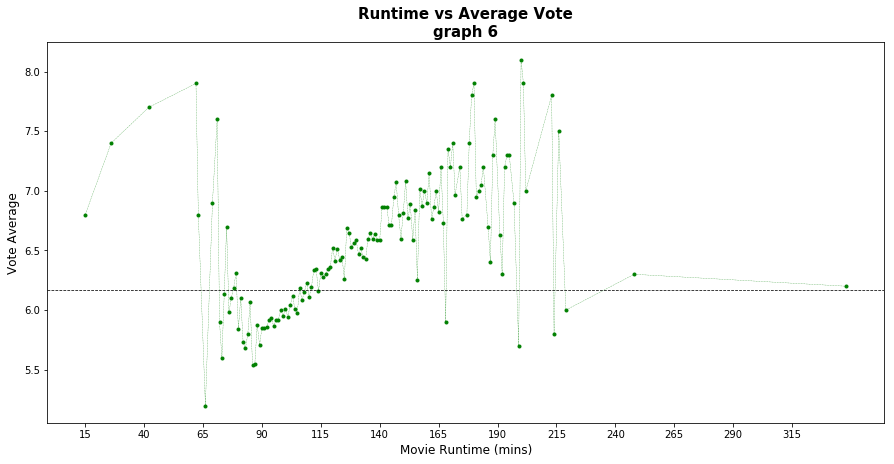

In [20]:
#runtime vs vote average
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_ticks(np.arange(min(mdb['runtime']), max(mdb['runtime']), 25))
temp = mdb.groupby('runtime', as_index=False)['vote_average'].mean()
xdata = temp.runtime.tolist()
ydata = temp.vote_average.tolist()
plt.plot(xdata, ydata, 'g.-.', linewidth=.25)
plt.axhline(mdb.vote_average.mean(), color='black', linestyle="dashed", linewidth=0.75)
plt.xlabel("Movie Runtime (mins)", fontsize=12)
plt.ylabel("Vote Average", fontsize=12)
plt.title("Runtime vs Average Vote\ngraph 6", fontsize=15, fontweight='bold');

### Q7. Does vote count affect the revenue?

In [21]:
#correlation between vote_average and revenue
mdb['revenue'].corr(mdb['vote_count'])

0.7545665575489416

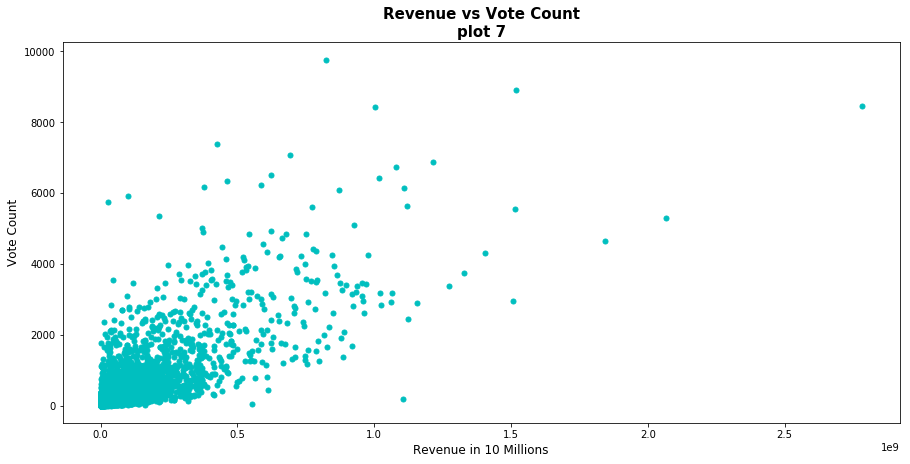

In [22]:
#scatter plot to determine the correlation between the two.
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(mdb['revenue'], mdb['vote_count'], c='c', s=25);
plt.xlabel("Revenue in 10 Millions", fontsize=12)
plt.ylabel("Vote Count", fontsize=12)
plt.title("Revenue vs Vote Count\nplot 7", fontsize=15, fontweight='bold');

###  Q8. Has there been a change in runtime over the years?

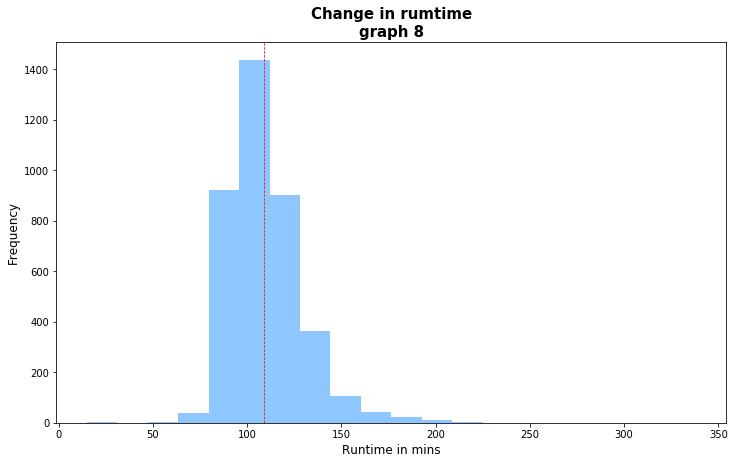

In [23]:
#Distribution of runtime
mdb['runtime'].hist(figsize=(12,7), color="dodgerblue", bins=20, grid=False, alpha=0.5)
plt.axvline(mdb.runtime.mean(), color = 'red', linestyle="dashed", linewidth=0.75)
plt.xlabel("Runtime in mins", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Change in rumtime\ngraph 8", fontsize=15, fontweight='bold');

In [24]:
#confirming with describe
mdb['runtime'].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

### Q9. Does popularity impact revenue?

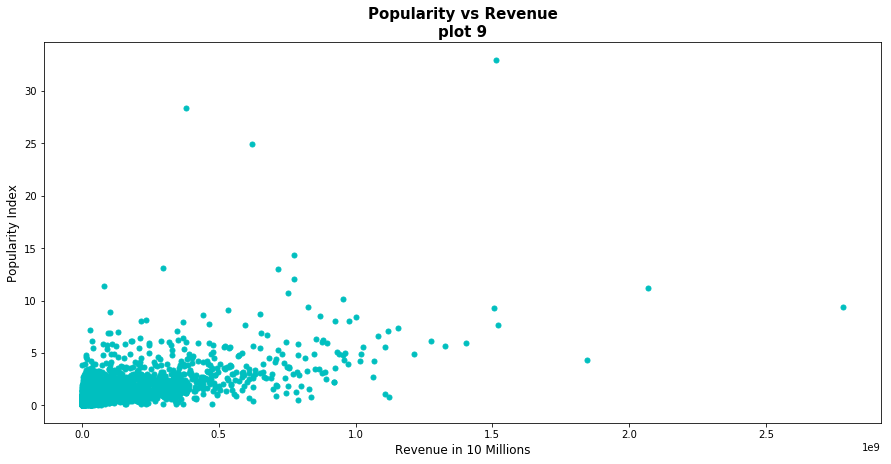

In [25]:
#Creating a scatterplot of revenue and popularity over the years
fig, ax = plt.subplots(figsize=(15,7))
plt.scatter(mdb['revenue'], mdb['popularity'], c='c', s=25);
plt.xlabel("Revenue in 10 Millions", fontsize=12)
plt.ylabel("Popularity Index", fontsize=12)
plt.title("Popularity vs Revenue\nplot 9", fontsize=15, fontweight='bold');

### Q10. Is there a major difference between the current budget/revenue compared to budget/revenue that accounts for 2010 infaltion?

In [26]:
#determing correlation between the two
mdb['budget'].corr(mdb['budget_adj'],method='pearson'), mdb['revenue'].corr(mdb['revenue_adj'],method='pearson')

(0.9585196816249244, 0.9008824624476255)

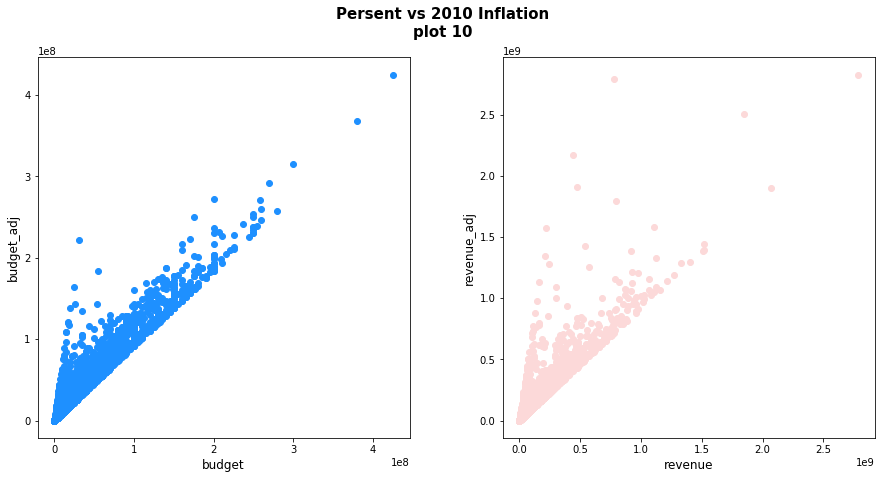

In [27]:
#scatter plot
fig, ax = plt.subplots(figsize=(15,7))
plt.suptitle("Persent vs 2010 Inflation\nplot 10", fontsize=15, fontweight='bold')
plt.subplot(1,2,1)
plt.scatter(mdb['budget'], mdb['budget_adj'], color = 'dodgerblue')
plt.xlabel("budget", fontsize=12)
plt.ylabel("budget_adj", fontsize=12)
plt.subplot(1,2,2)
plt.scatter(mdb['revenue'], mdb['revenue_adj'], color = '#FCD9D9')
plt.xlabel("revenue", fontsize=12)
plt.ylabel("revenue_adj", fontsize=12)
plt.subplots_adjust(wspace = 0.25);

In [28]:
#closing all plots to free memory
plt.close('all')

<a id='conclu_limit'></a>
## Conclusions and Limitations of the Explatory Data Analysis

## Limitations

### The following are the limitations:
- The above analysis done so far, confines itself to numeric data, text mining is not done, thus leaving spurious characters as is.
- By glancing at the dataset, we come to know that this dataset in purely Hollywood, movies made in other regions of the world are not present.
- The medium through which popularity is measured is unknown. This can impact the analysis as the limitations and bias inherent while gauging audience response will be present in the end values too.
- Vote average and vote count are two such variables, wherein they are taken at their face values. Their source of collection and calculation is unknown.
- The source of collected revenue is unknown.
- While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.
<br>

## Conclusions from the above graphs and charts:
+ From graph 1, most of the movies released till 2015, fall into _**"Drama, Comedy, Thriller"**_ genres.
+ From graph 2, there has been a growth in _**"Action, Crime, Adventure, Fanatsy and Animation"**_. _**2014**_ had most number of **Horror** movie releases.
+ From chart 3, **Q2** and **Q3** expirence most number of movie releases.
+ From chart 4, it can be concluded that **Q1** and **Q3** generate more revenue, when compared to **Q2** and **Q4** (ironic when judged with chart 3).
+ From chart 5, the average vote is approximately around to **6.16** ~ **6**.
+ From graph 6, it's observed that movies with runtime between **90** and **200** minutes have mean vote of 6, and movies with runtime **greater than** 100 minutes have better ratings/vote average.
+ From scatter plot 7, there seems to be a positive correlation between vote count and revenue; i.e., change in one variable wil result in a change in other variable.
+ From the distribution of runtime (graph 8), it can concluded that most of the movies have a runtime between **90** and **200** minutes.
+ From scatter plot 9, there seems to be a positive correlation between popularity and revenue earned; i.e., change in one variable wil result in a change in other variable.
+ From the scatter plot 10, it can be concluded that, there isn't much change in current and 2010 inflation values.

## Conclusions in general:
- The Data Analysis process has 5 five steps.
- Glancing at dataset at times can give wrong results, thus doing a thorough exploration can yield better results.
- Graphs and charts are better ways to present individual's understanding.
- Empty cells must be handled very varfully.

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'tmdb_dataset_analysis.ipynb'])

0